Hämtar MNIST-data...


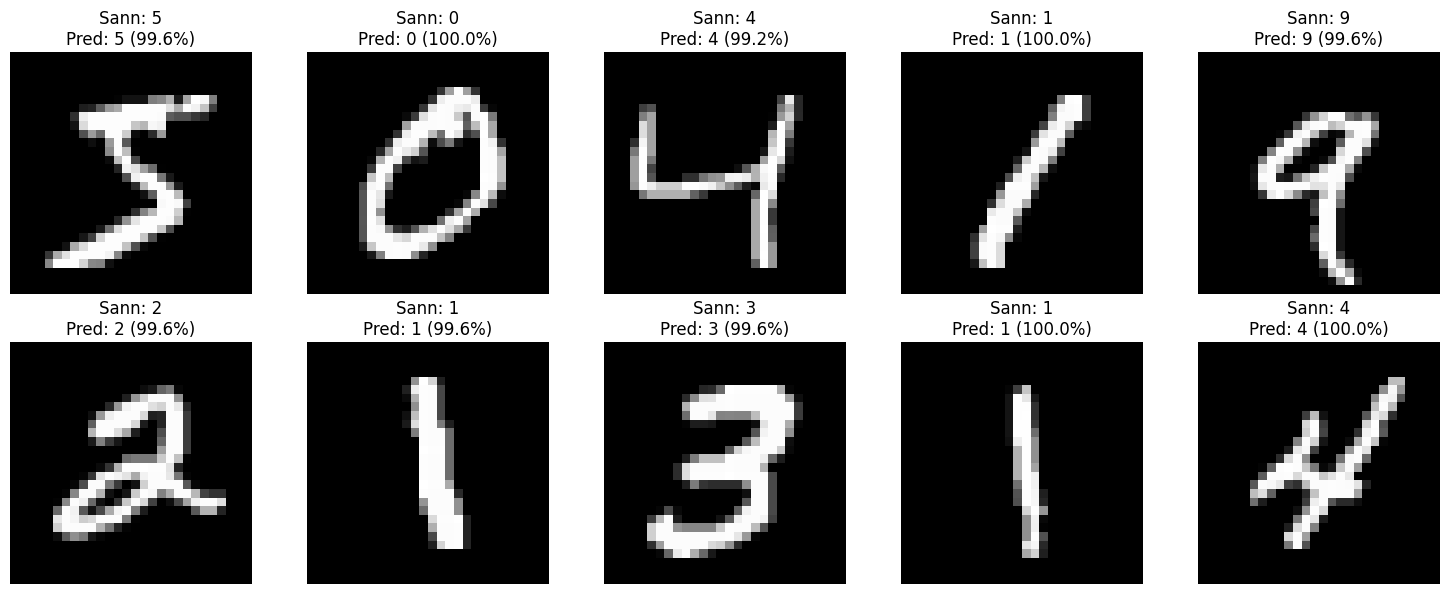

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from joblib import load
from sklearn.pipeline import Pipeline

# 1. Ladda MNIST (om du inte redan har X_test i minnet)
print("Hämtar MNIST-data...")
mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser='auto')
X_mnist, y_mnist = mnist["data"], mnist["target"]

# 2. Ladda din scaler och modell
model = load("mnist_extratrees_final.joblib")
scaler = load("mnist_scaler.joblib")
pipe = Pipeline([('scaler', scaler), ('model', model)])

# 3. Visa de första 10 bilderna
plt.figure(figsize=(15, 6))

for i in range(10):
    # Hämta en bild och dess sanna etikett
    image = X_mnist[i].reshape(1, -1)
    true_label = y_mnist[i]
    
    # Gör prediktion med din pipeline
    pred = pipe.predict(image)[0]
    proba = pipe.predict_proba(image)[0]
    conf = proba[int(pred)] # Sannolikheten för den gissade siffran

    # Skapa subplot (2 rader, 5 kolumner)
    plt.subplot(2, 5, i + 1)
    plt.imshow(image.reshape(28, 28), cmap="gray")
    
    # Sätt röd titel om den gissar fel, annars svart
    color = "black" if str(pred) == str(true_label) else "red"
    plt.title(f"Sann: {true_label}\nPred: {pred} ({conf:.1%})", color=color)
    plt.axis("off")

plt.tight_layout()
plt.show()